In [97]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("../input/train_sample.csv")
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [13]:
tmp = train.groupby(['ip', 'device', 'os'])['is_attributed'].apply(list).to_frame()

In [14]:
tmp.head()

is_attributed
ip device os              
9  1      13           [0]
10 1      13           [0]
          19           [0]
          22           [0]
19 1      16           [0]

In [16]:
tmp['click_counts'] = tmp['is_attributed'].str.len()

In [17]:
tmp.click_counts.value_counts()

1      65968
2       7785
3       2082
4        797
5        342
6        195
7        114
8         61
9         56
10        40
11        23
12        21
13        16
14        15
15        15
16        10
21         9
17         7
18         6
20         6
19         5
23         5
26         4
52         2
41         2
33         2
32         2
22         2
24         2
113        1
47         1
105        1
119        1
46         1
45         1
44         1
43         1
73         1
137        1
103        1
74         1
25         1
39         1
38         1
37         1
35         1
30         1
29         1
27         1
121        1
62         1
Name: click_counts, dtype: int64

In [30]:
tmp.loc[tmp.click_counts == 1]['is_attributed'].str.get(0).agg(['mean', 'sum','count'])

mean         0.003138
sum        207.000000
count    65968.000000
Name: is_attributed, dtype: float64

In [29]:
print(tmp.loc[tmp.click_counts == 2]['is_attributed'].str.get(0).agg(['mean', 'sum','count']))
print(tmp.loc[tmp.click_counts == 2]['is_attributed'].str.get(1).agg(['mean', 'sum','count']))


mean        0.000385
sum         3.000000
count    7785.000000
Name: is_attributed, dtype: float64
mean        0.000514
sum         4.000000
count    7785.000000
Name: is_attributed, dtype: float64


In [36]:
#User who downloaded, did they click back <- NOT ENOUGH DATA
print(tmp.loc[(tmp.click_counts >= 2) & (tmp['is_attributed'].str.get(0) == 1)]['is_attributed'].str.get(1).agg(['mean', 'sum','count']))

mean     0.0
sum      0.0
count    4.0
Name: is_attributed, dtype: float64


In [27]:
print(tmp.loc[tmp.click_counts == 3]['is_attributed'].str.get(0).agg(['mean', 'sum','count']))
print(tmp.loc[tmp.click_counts == 3]['is_attributed'].str.get(1).agg(['mean', 'sum','count']))
print(tmp.loc[tmp.click_counts == 3]['is_attributed'].str.get(2).agg(['mean', 'sum','count']))


mean        0.0
sum         0.0
count    2082.0
Name: is_attributed, dtype: float64
mean        0.0
sum         0.0
count    2082.0
Name: is_attributed, dtype: float64
mean        0.0
sum         0.0
count    2082.0
Name: is_attributed, dtype: float64


In [35]:
print(tmp.loc[tmp.click_counts >= 3]['is_attributed'].str.get(0).agg(['mean', 'sum','count']))


mean        0.000259
sum         1.000000
count    3863.000000
Name: is_attributed, dtype: float64


In [46]:
tmp['ip'] = tmp.index.get_level_values(0)
tmp['ip_counts'] = tmp.ip.map(train.groupby(['ip']).size())
tmp.head()

is_attributed  click_counts  ip_counts  ip
ip device os                                           
9  1      13           [0]             1          1   9
10 1      13           [0]             1          3  10
          19           [0]             1          3  10
          22           [0]             1          3  10
19 1      16           [0]             1          1  19

In [47]:
tmp.ip_counts.value_counts()

1      17423
2      13173
3       9584
4       6651
5       4830
6       3793
7       3101
8       2643
9       2286
10      1804
11      1474
12      1228
13       957
14       807
15       518
17       438
16       409
22       298
19       286
23       282
20       263
25       252
18       236
21       209
24       188
26       182
28       170
34       149
30       148
49       134
       ...  
135       43
116       42
134       41
167       40
109       40
92        39
90        39
95        38
104       37
117       37
38        36
149       35
173       33
94        33
80        33
89        32
85        32
96        31
100       30
69        28
57        28
58        28
74        27
67        27
66        27
59        26
71        22
54        22
41        18
43        17
Name: ip_counts, Length: 100, dtype: int64

In [48]:
tmp.loc[(tmp.click_counts == 1) & (tmp.ip_counts == 1)]['is_attributed'].str.get(0).agg(['mean', 'sum','count'])

mean         0.008609
sum        150.000000
count    17423.000000
Name: is_attributed, dtype: float64

In [49]:
tmp.loc[(tmp.click_counts == 1) & (tmp.ip_counts == 2)]['is_attributed'].str.get(0).agg(['mean', 'sum','count'])

mean         0.00189
sum         23.00000
count    12168.00000
Name: is_attributed, dtype: float64

In [50]:
tmp.loc[(tmp.click_counts == 1) & (tmp.ip_counts == 3)]['is_attributed'].str.get(0).agg(['mean', 'sum','count'])

mean        0.000712
sum         6.000000
count    8427.000000
Name: is_attributed, dtype: float64

In [55]:
tmp.loc[(tmp.click_counts == 1) & (tmp.ip_counts >= 3)]['is_attributed'].str.get(0).agg(['mean', 'sum','count'])

mean         0.000935
sum         34.000000
count    36377.000000
Name: is_attributed, dtype: float64

In [58]:
tmp.loc[(tmp.click_counts == 1) & (tmp.ip_counts >= 10)]['is_attributed'].str.get(0).agg(['mean', 'sum','count'])

mean        0.000948
sum         9.000000
count    9490.000000
Name: is_attributed, dtype: float64

In [59]:
tmp.loc[(tmp.click_counts > 1) & (tmp.ip_counts == 1)]['is_attributed'].str.get(0).agg(['mean', 'sum','count'])

mean       NaN
sum      False
count        0
Name: is_attributed, dtype: object

In [60]:
tmp.loc[(tmp.click_counts > 1) & (tmp.ip_counts == 2)]['is_attributed'].str.get(0).agg(['mean', 'sum','count'])

mean        0.000995
sum         1.000000
count    1005.000000
Name: is_attributed, dtype: float64

In [65]:
tmp.loc[(tmp.click_counts >= 2) & (tmp.ip_counts >= 3)]['is_attributed'].str.get(0).agg(['mean', 'sum','count'])

mean         0.000282
sum          3.000000
count    10643.000000
Name: is_attributed, dtype: float64

In [69]:
tmp['app'] = train.groupby(['ip', 'device', 'os'])['app'].apply(list)
tmp.head()

is_attributed  click_counts  ip_counts  ip   app
ip device os                                                 
9  1      13           [0]             1          1   9   [9]
10 1      13           [0]             1          3  10  [18]
          19           [0]             1          3  10  [12]
          22           [0]             1          3  10  [11]
19 1      16           [0]             1          1  19  [14]

In [70]:
tmp2 = tmp.loc[(tmp.click_counts == 1) & (tmp.ip_counts == 1)]
tmp2['is_attributed'] = tmp2.is_attributed.str.get(0)
tmp2['app'] = tmp2.app.str.get(0)

tmp2.head()

/home/mohsin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/mohsin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,,,is_attributed,click_counts,ip_counts,ip,app
ip,device,os,,,,,
9,1,13,0,1,1,9,9
19,1,16,0,1,1,19,14
25,1,23,0,1,1,25,3
31,1,2,0,1,1,31,26
33,1,20,0,1,1,33,12


In [71]:
tmp2.app.value_counts()

3      3156
12     2258
2      1801
15     1503
9      1486
18     1457
14      970
1       580
13      440
8       348
21      332
11      320
26      305
64      272
23      263
6       242
20      216
24      172
19      163
7       147
28      135
25      128
27      105
29       75
10       75
32       57
17       56
5        54
22       52
150      16
       ... 
66        1
160       1
163       1
145       1
95        1
68        1
121       1
158       1
46        1
30        1
124       1
347       1
171       1
123       1
43        1
42        1
425       1
105       1
116       1
232       1
216       1
168       1
104       1
79        1
119       1
486       1
261       1
101       1
85        1
16        1
Name: app, Length: 98, dtype: int64

In [72]:
tmp2.loc[tmp2.app == 3, 'is_attributed'].agg(['mean', 'sum','count'])

mean        0.000317
sum         1.000000
count    3156.000000
Name: is_attributed, dtype: float64

In [73]:
tmp2.loc[tmp2.app == 12, 'is_attributed'].agg(['mean', 'sum','count'])

mean        0.000443
sum         1.000000
count    2258.000000
Name: is_attributed, dtype: float64

In [74]:
tmp2.loc[tmp2.app == 2, 'is_attributed'].agg(['mean', 'sum','count'])

mean        0.0
sum         0.0
count    1801.0
Name: is_attributed, dtype: float64

In [75]:
tmp2.loc[tmp2.app == 15, 'is_attributed'].agg(['mean', 'sum','count'])

mean        0.000665
sum         1.000000
count    1503.000000
Name: is_attributed, dtype: float64

In [76]:
tmp2.loc[tmp2.app == 9, 'is_attributed'].agg(['mean', 'sum','count'])

mean        0.002692
sum         4.000000
count    1486.000000
Name: is_attributed, dtype: float64

In [77]:
tmp2.loc[tmp2.app == 18, 'is_attributed'].agg(['mean', 'sum','count'])

mean        0.001373
sum         2.000000
count    1457.000000
Name: is_attributed, dtype: float64

In [78]:
tmp2.loc[tmp2.app == 14, 'is_attributed'].agg(['mean', 'sum','count'])

mean       0.0
sum        0.0
count    970.0
Name: is_attributed, dtype: float64

In [80]:
tmp2['app_counts'] = tmp2.app.map(tmp2.groupby('app').size())
tmp2.head()

/home/mohsin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,,,is_attributed,click_counts,ip_counts,ip,app,app_counts
ip,device,os,,,,,,
9,1,13,0,1,1,9,9,1486
19,1,16,0,1,1,19,14,970
25,1,23,0,1,1,25,3,3156
31,1,2,0,1,1,31,26,305
33,1,20,0,1,1,33,12,2258


In [105]:
tmp2.loc[tmp2.app_counts < 100, 'is_attributed'].agg(['mean', 'sum','count'])

mean       0.147436
sum       92.000000
count    624.000000
Name: is_attributed, dtype: float64

In [67]:
train.is_attributed.agg(['mean', 'sum','count'])

mean          0.00227
sum         227.00000
count    100000.00000
Name: is_attributed, dtype: float64

In [92]:
136/227

0.5991189427312775

In [94]:
1474/100000

0.01474

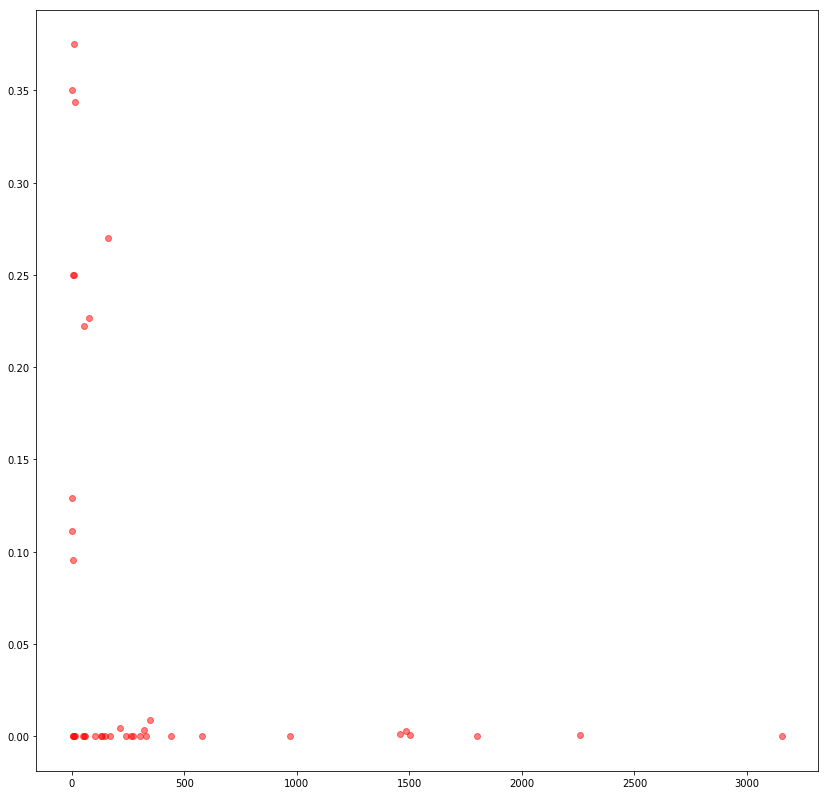

In [102]:
plt.figure(figsize=(14,14))
plt.plot(tmp2.groupby('app_counts')['is_attributed'].mean(), 'ro', alpha=0.5)
plt.show()